# Contexto: Uma empresa de empréstimo de automóveis está com uma alta demanda para uma frota reduzida e uma alta taxa de clientes que não pagam o empréstimo no tempo devido.

# Objetivo: identificar esses clientes inadimplentes antes mesmo da empresa conceder o empréstimo do veículo

In [ ]:
import pandas as pd
dados = pd.read_csv('/content/drive/MyDrive/data_bases_alura/emp_automovel.csv')
# dados.round(1)

In [ ]:
x = dados.drop('inadimplente', axis =1)
y = dados ['inadimplente']

# Arvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [ ]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


## Divisao treino/validação/testes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9206155632984901
Acurácia de validação: 0.9055831373573731


## Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10355   124]
 [  960    42]]


Modelo ta falhando em identificar clientes inadiplemtes, so identificou 45, o foco do modelo é identificar os inadimplentes



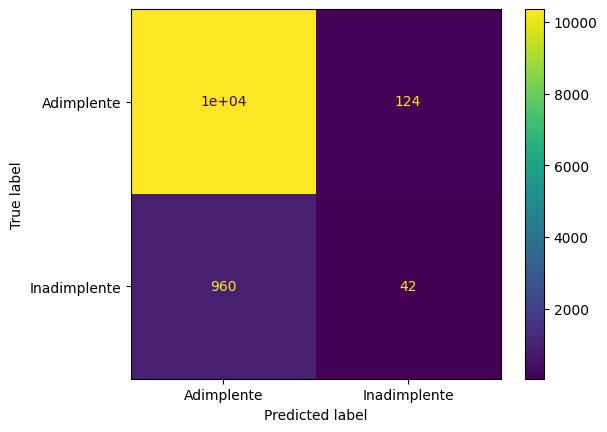

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();
print('Modelo ta falhando em identificar clientes inadiplemtes, so identificou 45, o foco do modelo é identificar os inadimplentes\n')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier( max_depth=10)
# random_forest.fit(x_treino, y_treino)

# print(f'Acurácia de treino: {random_forest.score(x_treino, y_treino)}')
# print(f'Acurácia de validação: {random_forest.score(x_val, y_val)}')

In [ ]:
# y_previsto_rf = random_forest.predict(x_val)
# matriz_confusao_rf = confusion_matrix(y_val, y_previsto_rf)
# visualizacao_rf = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao_rf, display_labels = ['Adimplente', 'Inadimplente'])
# visualizacao_rf.plot();

# Métricas de avaliação

## Acuracia

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9055831373573731


## Precisao e recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')
# recall é a metrica mais importante do projeto

Precisão: 0.25301204819277107
Recall: 0.041916167664670656


## F1 Score

In [ ]:
from sklearn.metrics import f1_score
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.07191780821917808


## Curva Roc

In [ ]:
from sklearn.metrics import RocCurveDisplay

auc esta proximo de 0,5, mostrando que o modelo esta classifcando de forma aleatoria



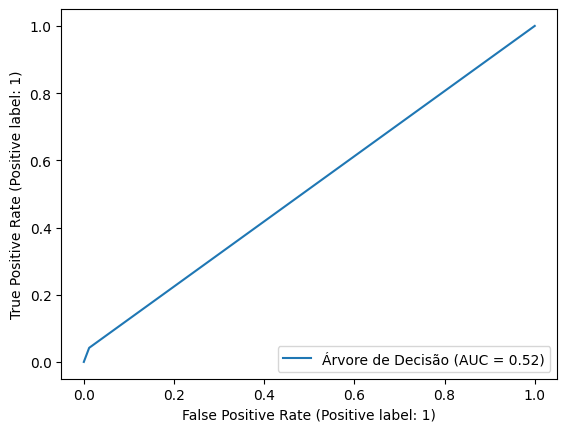

In [ ]:
print('auc esta proximo de 0,5, mostrando que o modelo esta classifcando de forma aleatoria\n')
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

## Curva Precision x Recall

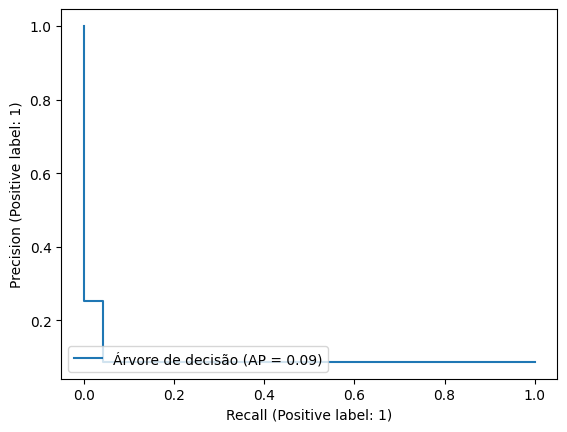

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

## Relatorio de metricas

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



# Validação cruzada

In [ ]:
from sklearn.model_selection import cross_validate, KFold

modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)

cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.21797395, 0.20698953, 0.20535588, 0.20636129, 0.21040583]),
 'score_time': array([0.00467062, 0.00446558, 0.00466275, 0.00814867, 0.00487232]),
 'test_score': array([0.91301034, 0.90799216, 0.90744774, 0.91289199, 0.89960801])}

In [ ]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')
# esse intervalo de confiança diz que o modelo tem uma acuracia entre 0,89 e 0,91, mas oq interessa é o recall

Intervalo de confiança: [0.8984090472664442, 0.9179710481018942]


## Validação cruzada com o recall

In [ ]:
def intervalo_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')#parametro socring = recall
cv_resultados

{'fit_time': array([0.2064302 , 0.205158  , 0.20251966, 0.21996379, 0.21173382]),
 'score_time': array([0.00968742, 0.00724101, 0.00726938, 0.00876427, 0.0083065 ]),
 'test_score': array([0.02642008, 0.0210396 , 0.0196802 , 0.0156658 , 0.02427746])}

In [ ]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.013962861367909935, 0.02887039183794934]


## Validações com outras métricas

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.20522547, 0.21381235, 0.2176044 , 0.20763397, 0.20657444]),
 'score_time': array([0.02354693, 0.01650572, 0.01649976, 0.01689076, 0.01543474]),
 'test_accuracy': array([0.91355471, 0.90799216, 0.9070122 , 0.91365418, 0.89939024]),
 'test_recall': array([0.02906209, 0.0210396 , 0.01845018, 0.0156658 , 0.02427746]),
 'test_precision': array([0.27160494, 0.23943662, 0.21126761, 0.23529412, 0.20792079]),
 'test_f1': array([0.05250597, 0.03868032, 0.03393665, 0.02937576, 0.04347826])}

In [ ]:
def relatorio_metricas(resultados):
  for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    media = resultados[metrica].mean()
    desvio_padrao = resultados[metrica].std()
    print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')
relatorio_metricas(cv_resultados)

Intervalo de confiança(test_accuracy): [0.8978358883140796, 0.918805507386758]
Intervalo de confiança(test_recall): [0.012393000014981743, 0.031005051441237854]
Intervalo de confiança(test_precision): [0.18716360865728435, 0.2790460206827094]
Intervalo de confiança(test_f1): [0.023618932694964095, 0.05557185233626294]


## Estratificando os dados

In [ ]:
# existe um desbalanceamento entre inadimplente e adinplentes
dados['inadimplente'].value_counts(normalize = True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

intervalo_conf(cv_resultados)
#apenas mudou o metodo de validação cruzada, agora eh levado em consideração a proporção de dados de clientes adimplentes e inadimplentes,
#  sendo feita a estratificação dos dados

Intervalo de confiança: [0.020183209313105497, 0.03668834463597935]


# Balanceamento dos dados

## Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

y_balanceado.value_counts(normalize = True)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

intervalo_conf(cv_resultados)
#Aumentouu bastante porém não são dados do mundo real

Intervalo de confiança: [0.7135188915078211, 0.7584227358206458]


## Pipeline para validação

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [ ]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.20446586001659228, 0.3263431972403902]


## Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)]) # muda para undersample

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [ ]:
intervalo_conf(cv_resultados) # melhorou muito o intervalo

Intervalo de confiança: [0.6157389599215545, 0.7037731212986161]


## Outro metodo de balanceamento - SMOTEENN


In [ ]:
from imblearn.combine import SMOTEENN

modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arvore', modelo)])

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.2842988382241262, 0.44006192030402297]


# Testando o modelo

In [ ]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



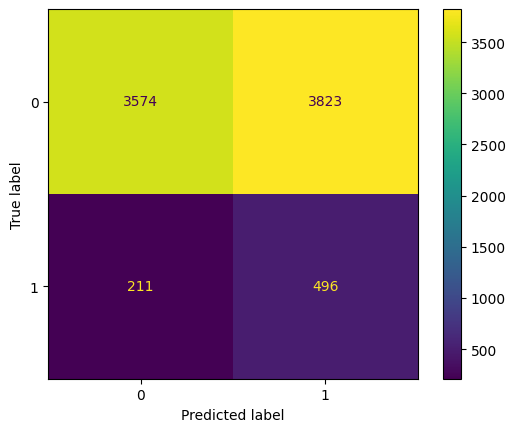

In [ ]:
print(classification_report(y_teste, y_previsto))
print('melhora consideravel dos verda')
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);